# Spotify Data Collection

#### EMAT 22110 - Data in Emerging Media and Technology
#### Author: Kerri Donaldson
#### Created: 4/19/21
#### Last Updated: 5/10/21

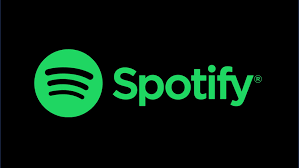

### Quick Overview

This report will go over data collected from the beginning of 2020 to 2021. I collected this data by requesting it from their website under my account in privacy. I had already done it at the beginning of the semester because I knew it could take a while and if I had the chance I wanted to use spotify data for my project. The goal of this is to find out how much my music taste has changed and who I listen to the most. The questions I have are "Do I listen to a lot of artists?" and "Who are the main artists I listen to?". I collected my data from spotify to look at the song, the artist and the album that it came from. I will also need to find out the dates that the songs were listened to.

I also want to see what other data Spotify has collected about me like my name and when I created my account.

###### Load in the required packages

In [142]:
import json
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
from datetime import datetime as dt

In [31]:
with open(r"C:\Users\kdona\Desktop\My Stuff\my_spotify_data\MyData\YourLibrary.json") as yl:
    yourlibrary = json.load(yl)
with open(r"C:\Users\kdona\Desktop\My Stuff\my_spotify_data\MyData\Userdata.json") as ud:
    userdata = json.load(ud)
with open(r"C:\Users\kdona\Desktop\My Stuff\my_spotify_data\MyData\StreamingHistory0.json", encoding = 'utf-8') as s:
    streaming = json.load(s)
with open(r"C:\Users\kdona\Desktop\My Stuff\my_spotify_data\MyData\StreamingHistory1.json") as s1:
    streaming1 = json.load(s1)
with open(r"C:\Users\kdona\Desktop\My Stuff\my_spotify_data\MyData\Identity.json") as i:
    identity = json.load(i)

I was able to pull the date that I created my Spotify account from the data file. It was November of 2014(I was 13). 

They also had my profile picture but surprisingly they did not have my name recorded anywhere. I know that this is not useful but I thought it was cool.

In [32]:
print(userdata["creationTime"])

2014-11-15


In [33]:
print(identity["largeImageUrl"])

https://i.scdn.co/image/ab6775700000ee851f04b8f970ebefee78820879


I started by finding out if the information in the file was a dictionary or a list and then found the keys.

In [34]:
type(yourlibrary)

dict

In [35]:
yourlibrary.keys()

dict_keys(['tracks', 'albums', 'shows', 'episodes', 'bannedTracks', 'other'])

In [36]:
len(yourlibrary["tracks"])

91

In [37]:
type(yourlibrary["tracks"])

list

In [38]:
yourlibrary["tracks"][0:1000][0].keys()

dict_keys(['artist', 'album', 'track'])

In [39]:
len(streaming)

10000

In [40]:
streaming[0:100][0].keys()

dict_keys(['endTime', 'artistName', 'trackName', 'msPlayed'])

In [41]:
len(streaming1)

1002

In [42]:
streaming1[0:100][0].keys()

dict_keys(['endTime', 'artistName', 'trackName', 'msPlayed'])

#### Make data easier to read

I used pandas to create a table for the different data files.

In [43]:
pd.set_option('display.max_rows', 500)
likes = pd.DataFrame(yourlibrary["tracks"], columns=["artist", "album", "track"])
likes.head()

,artist,album,track
0,Jack Garratt,Phase,Weathered
1,Jack Garratt,Phase,Falling
2,TVA,Common Culture : A Compilation by Connor Franta,Sensual
3,ODESZA,"A Music Compilation by Connor Franta, Vol. I",Say My Name
4,Panic! At The Disco,Hallelujah,Hallelujah


In [44]:
pd.set_option('display.max_rows', 10000000000)
songs = pd.DataFrame(streaming, columns=["endTime", "artistName", "trackName", "msPlayed"])
songs.head()

,endTime,artistName,trackName,msPlayed
0,2020-02-21 20:52,Chelsea Cutler,Anything for You,201904
1,2020-02-21 20:56,Joni Payne,Contemporary Love,223384
2,2020-02-21 20:59,Marian Hill,Down,197773
3,2020-02-21 21:02,Transviolet,Girls Your Age,208053
4,2020-02-21 21:02,Wet,All the Ways,29183


In [45]:
pd.set_option('display.max_rows', 10000000000)
songs1 = pd.DataFrame(streaming1, columns=["endTime", "artistName", "trackName", "msPlayed"])
songs1.head()

,endTime,artistName,trackName,msPlayed
0,2021-01-19 00:49,Caye,Happy?,152226
1,2021-01-19 00:51,Boon,i might like u,135704
2,2021-01-19 00:54,Baltazar Lora,Her Name Is Midnight,191162
3,2021-01-19 00:57,Ben Kessler,Concrete,152051
4,2021-01-19 00:59,Payday,Beam,103846


I narrowed down the columns so it will be easier to work with.

In [47]:
yourlibrary_df = pd.DataFrame(yourlibrary['tracks'], columns = ['artist', 'track'])
yourlibrary_df.head()

,artist,track
0,Jack Garratt,Weathered
1,Jack Garratt,Falling
2,TVA,Sensual
3,ODESZA,Say My Name
4,Panic! At The Disco,Hallelujah


In [48]:
count_yourlibrary_df = yourlibrary_df.groupby('artist').count()
count_yourlibrary_df.head()

,track
artist,
AJR,1
Alice Boman,1
Allie X,1
Aly & AJ,1
Andrew Lloyd Webber,20


In [49]:
count_yourlibrary_df.sort_values(["track"], axis=0, ascending=True, inplace=True)
count_yourlibrary_df.head()

,track
artist,
AJR,1
Mambo King,1
Manicanparty,1
Nao,1
New Politics,1


In [51]:
count_streaming_df = pd.DataFrame(streaming, columns = ['artistName', 'trackName'])
count_streaming_df.head()

,artistName,trackName
0,Chelsea Cutler,Anything for You
1,Joni Payne,Contemporary Love
2,Marian Hill,Down
3,Transviolet,Girls Your Age
4,Wet,All the Ways


In [52]:
count_streaming_df = count_streaming_df.groupby('artistName').count()
count_streaming_df.head()

,trackName
artistName,
$NOT,2
12AM,1
14KT,1
1990nowhere,5
24hrs,6


In [53]:
count_streaming_df.sort_values(["trackName"], axis=0, ascending=True, inplace=True)
count_streaming_df.head()

,trackName
artistName,
Łaszewo,1
Fitz and The Tantrums,1
Otesla,1
Fickle Friends,1
Owl City,1


In [54]:
streaming1_df = pd.DataFrame(streaming1, columns = ['artistName', 'trackName'])
streaming1_df.head()

,artistName,trackName
0,Caye,Happy?
1,Boon,i might like u
2,Baltazar Lora,Her Name Is Midnight
3,Ben Kessler,Concrete
4,Payday,Beam


In [55]:
count_streaming1_df = streaming1_df.groupby('artistName').count()
count_streaming1_df.head()

,trackName
artistName,
AMAG,4
Abe Parker,12
Alexander Charles,1
Anthony Russo,2
Aries,3


In [56]:
count_streaming1_df.sort_values(["trackName"], axis=0, ascending=True, inplace=True)
count_streaming1_df.head()

,trackName
artistName,
Tre Breezy,1
Alexander Charles,1
KILLBOY,1
Nabes,1
Avenue Beat,1


## Graphs 
###### These first two pairs of graphs are for the json file called yourlibrary.

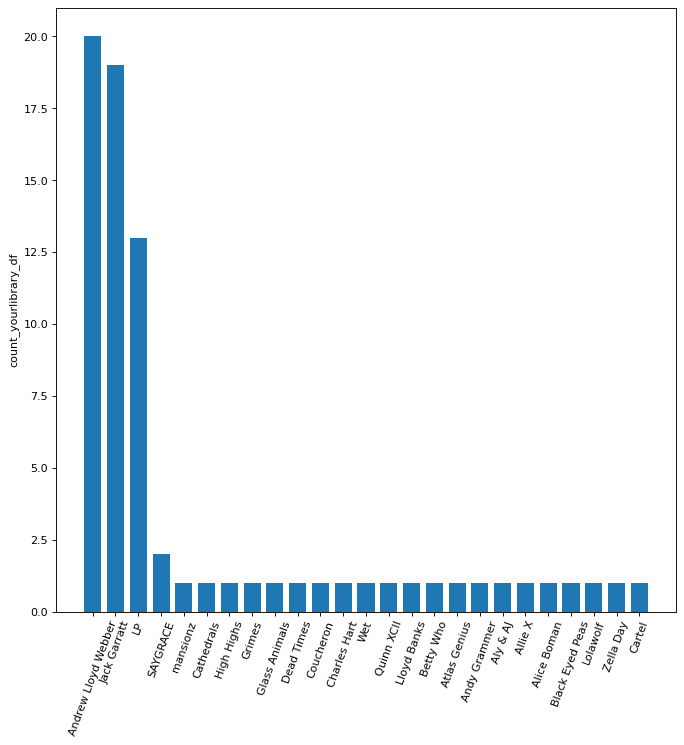

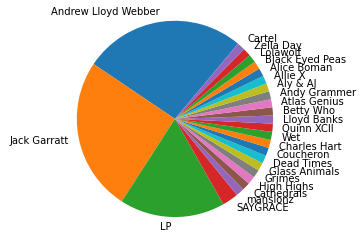

In [117]:
sshorty = count_yourlibrary_df.tail(25)
sortcount = sshorty.sort_values('track', ascending=False)
labels = sortcount['track'].keys()
vals = sortcount['track']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('count_yourlibrary_df')
plt.xticks(rotation=70)
plt.show()

fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels, startangle = 50)
ax2.axis('equal')
plt.show()

The graphs above show the songs that I listened to the most in that playlist.
###### .
The graphs below are made to show how I listened to a lot of different artists. 

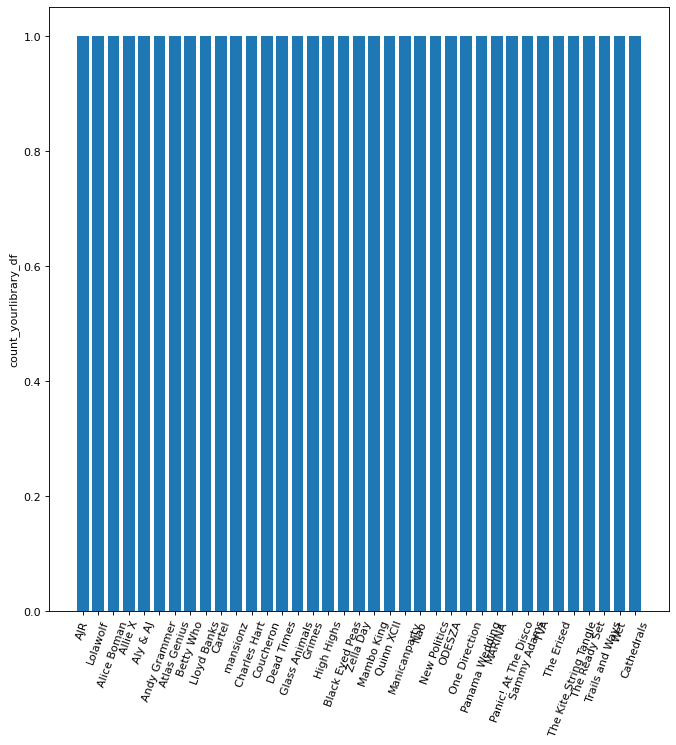

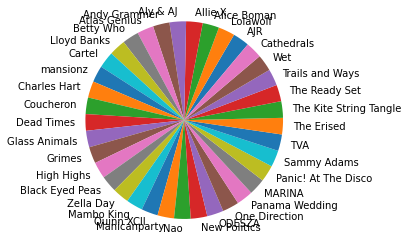

In [129]:
sshorty1 = count_yourlibrary_df.head(37)
sortcount = sshorty1.sort_values('track' ,ascending=False)
labels = sortcount['track'].keys()
vals = sortcount['track']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('count_yourlibrary_df')
plt.xticks(rotation=70)
plt.show()

fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels, startangle = 50)
ax2.axis('equal')
plt.show()

###### These two pairs of graphs below are for the json file called streaming.

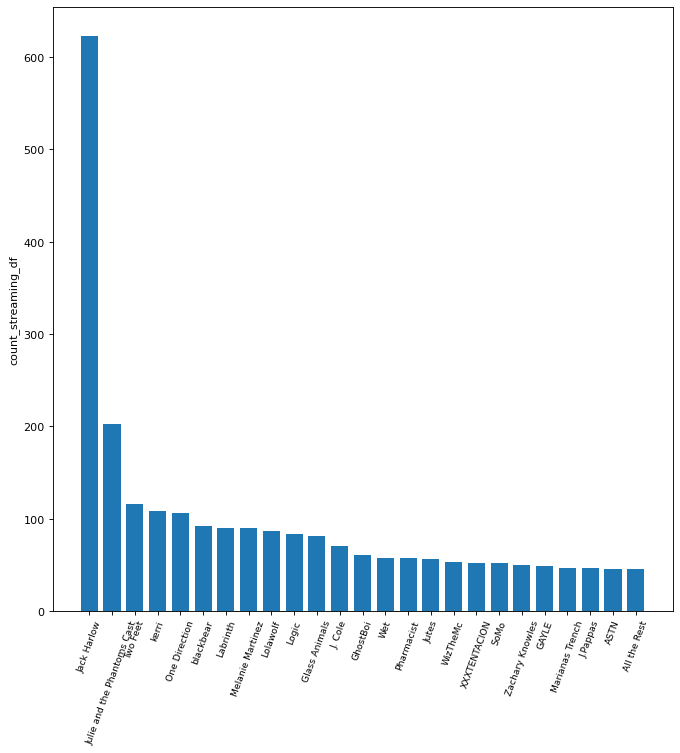

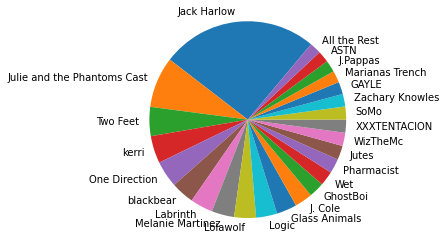

In [107]:
sshorts = count_streaming_df.tail(25)
sortcount = sshort.sort_values('trackName' ,ascending=False)
labels = sortcount['trackName'].keys()
vals = sortcount['trackName']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('count_streaming_df')
plt.xticks(rotation=70, fontsize = 'small')
plt.show()

fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels, startangle = 50)
ax2.axis('equal')
plt.show()

The graphs above show the songs that I listened to the most in the first streaming history json file I downloaded.
###### .
The graphs below are made to show how I listened to a lot of different artists in the first streaming history file. 

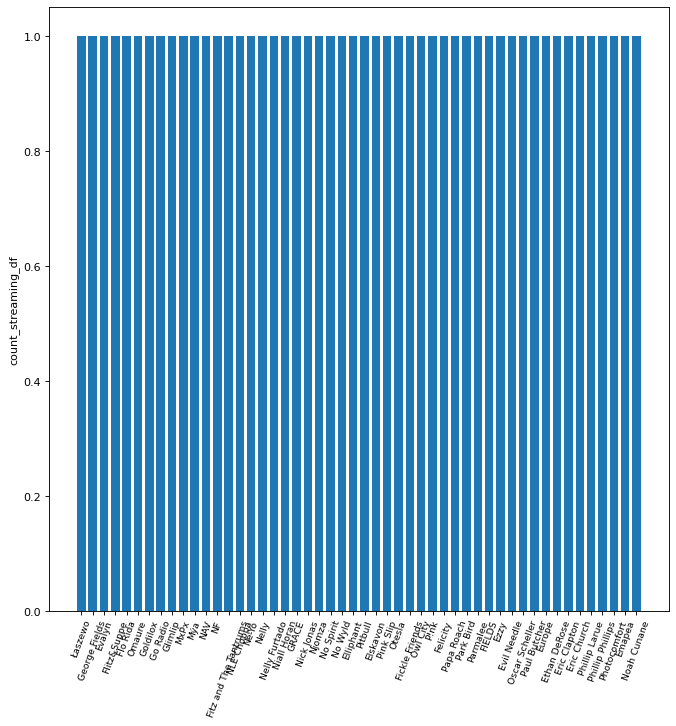

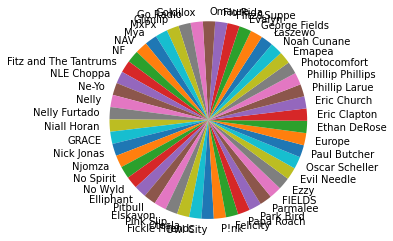

In [136]:
sshorts0 = count_streaming_df.head(50)
sortcount = sshorts0.sort_values('trackName' ,ascending=False)
labels = sortcount['trackName'].keys()
vals = sortcount['trackName']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('count_streaming_df')
plt.xticks(rotation=70, fontsize = 'small')
plt.show()

fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels, startangle = 50)
ax2.axis('equal')
plt.show()

###### These two pairs of graphs below are for the json file called streaming1.

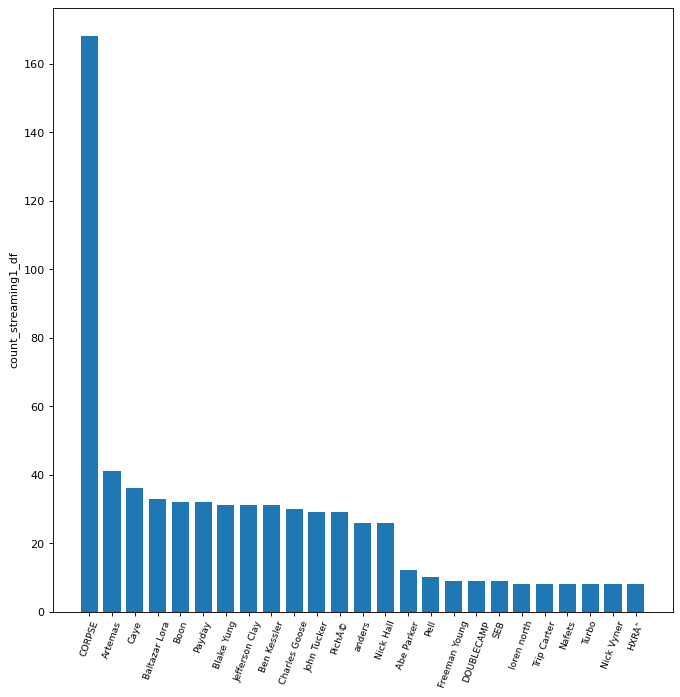

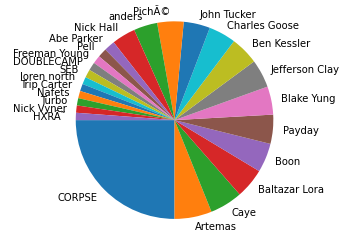

In [111]:
sshorts1 = count_streaming1_df.tail(25)
sortcount = sshorts1.sort_values('trackName' ,ascending=False)
labels = sortcount['trackName'].keys()
vals = sortcount['trackName']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('count_streaming1_df')
plt.xticks(rotation=70, fontsize = 'small')
plt.show()

fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels, startangle = -180)
ax2.axis('equal')
plt.show()

The graphs above show the songs that I listened to the most in the second streaming history json file I downloaded.
###### .
The graphs below are made to show how I listened to a lot of different artists in the second streaming history file. 

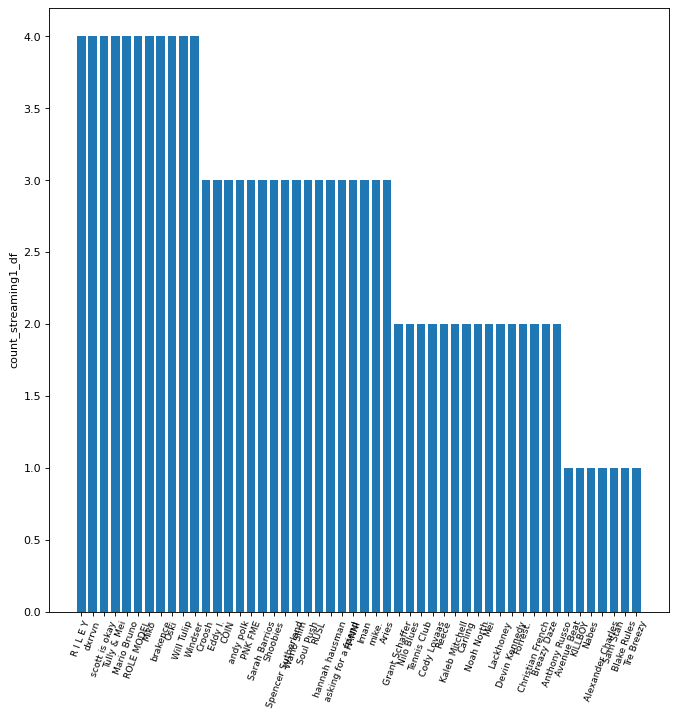

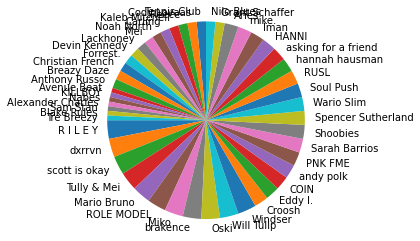

In [141]:
sshorts1 = count_streaming1_df.head(50)
sortcount = sshorts1.sort_values('trackName' ,ascending=False)
labels = sortcount['trackName'].keys()
vals = sortcount['trackName']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('count_streaming1_df')
plt.xticks(rotation=70, fontsize = 'small')
plt.show()

fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels, startangle = -180)
ax2.axis('equal')
plt.show()

## Analysis

There are a lot of artists that I listen to. There are also a few that I listen to frequently. I started the analyzing by counting the amount of tracks per artist after loading in the datasets. I added in some bar graphs and pie graphs which I will have to fix because of how hard some are to read. I am planning to go more in depth and compare bewtween different dates.  This will help me understand how I was feeling on a specific day or during a specific week. 

## Conclusions

###### pt 1
I created this account when I was 13 which is crazy because I thought that I would have had it longer. I have found many of songs that I do not remember. There are also songs that I liked a lot and listened to them repeatedly. The milliseconds of how long I listened to each song is a lot more than I thought it would be. 

###### pt 2
I found out part of the answer to my question. I have noticed that I listen to many different artists than I used to all in different genres of music. The most listened to artists I listened to at the beginning of this year was CORPSE. Before that Jack Harlow was a top artist I listened to. I have data from a playlist that was made just before I saw Phantom of the Opera in London, England. That data shows that I listened to the music from that play constantly, probably due to my excitement about the trip.

###### pt 3
I realized while going through the data in the files I saved, the last one had been messed up a little. Not in the sense that it is wrong but that apparently one artist I listened to a lot more than I thought. The artist I am talking about is CORPSE. The only reason the numbers are so high for this artist is that on the days I would go to work I would listen to them constantly. Any other time I am listening to multiple artists. 

###### pt 4 
There were many songs that I only listened to once. Those were because I was listening to a playlist called Discover weekly that is created for me by spotify based on what i listen to, and those are the ones that I ended up not liking as much. Other songs I listened to a little more but not a lot, because there is always new music every week. I try not to get stuck listening to the same music. I used to do that a lot which is also something you can see in the graphs.

### Limitations

I did not have many limitations with this report. The only one that stuck out to me was that there were no dates for when I listened to these songs. I thought that it would be a part of the files but it was not so I had to change my question a little bit. This did not stop me from answering what I really wanted to know though which I was very happy about.

### Alternative Approaches + Next Steps

Other approaches I could take are focusing more on the amount of time specific songs are played instead of the amount of times I listened to songs by the artists. Next steps could be to add in what I just wrote for different approaches. I also requested my data again at the beginning of this project in hopes of using it. I was not able to but since the data I have already covers the past year it did not matter too much. Something I could do next is go through that data too so that I could also add in what I have been listening to recently.